<a href="https://colab.research.google.com/github/VarunMadhav/StockPredict/blob/master/newstocktwo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas numpy matplotlib scikit-learn tensorflow keras

In [2]:
pip install keras

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import math
from sklearn.metrics import mean_squared_error

In [5]:
df = pd.read_csv('META.csv')

In [6]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-20,181.880005,184.229996,181.369995,182.720001,182.526337,10352000
1,2019-05-21,184.570007,185.699997,183.889999,184.820007,184.624115,7502800
2,2019-05-22,184.729996,186.740005,183.610001,185.320007,185.123581,9213800
3,2019-05-23,182.419998,183.899994,179.669998,180.869995,180.678299,12768800
4,2019-05-24,182.330002,183.630005,180.830002,181.059998,180.868088,8807700
...,...,...,...,...,...,...,...
1082,2023-09-06,301.709991,303.299988,295.660004,299.170013,298.852936,15418100
1083,2023-09-07,298.000000,307.049988,292.220001,298.670013,298.353455,33748700
1084,2023-09-08,299.220001,305.250000,296.779999,297.890015,297.574280,17548000
1085,2023-09-11,301.410004,309.040009,301.279999,307.559998,307.234009,19489300


In [7]:
df1 = df.reset_index()['Close']

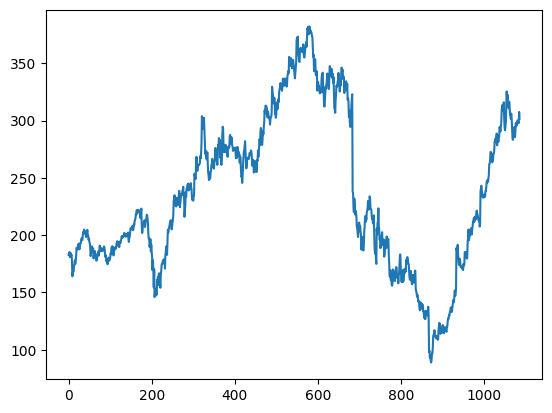

In [8]:
plt.plot(df1)
plt.show()

In [9]:
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

In [10]:
training_size = int(len(df1) * 0.65)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size, :], df1[training_size:len(df1), :1]

In [11]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [12]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [13]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [14]:
model.fit(X_train, y_train, validation_data=(X_test, ytest), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
10/10 [==============================] - 10s 391ms/step - loss: 0.1145 - val_loss: 0.0095
Epoch 2/100
10/10 [==============================] - 2s 179ms/step - loss: 0.0185 - val_loss: 0.0139
Epoch 3/100
10/10 [==============================] - 2s 181ms/step - loss: 0.0110 - val_loss: 0.0081
Epoch 4/100
10/10 [==============================] - 2s 178ms/step - loss: 0.0082 - val_loss: 0.0090
Epoch 5/100
10/10 [==============================] - 2s 183ms/step - loss: 0.0061 - val_loss: 0.0048
Epoch 6/100
10/10 [==============================] - 2s 229ms/step - loss: 0.0051 - val_loss: 0.0037
Epoch 7/100
10/10 [==============================] - 3s 295ms/step - loss: 0.0046 - val_loss: 0.0031
Epoch 8/100
10/10 [==============================] - 2s 181ms/step - loss: 0.0042 - val_loss: 0.0031
Epoch 9/100
10/10 [==============================] - 2s 182ms/step - loss: 0.0041 - val_loss: 0.0032
Epoch 10/100
10/10 [==============================] - 2s 182ms/step - loss: 0.0040 - val_l

In [15]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

9/9 [==============================] - 0s 44ms/step


In [16]:
print(f"Train RMSE: {math.sqrt(mean_squared_error(y_train, train_predict))}")
print(f"Test RMSE: {math.sqrt(mean_squared_error(ytest, test_predict))}")

Train RMSE: 281.63740123189416
Test RMSE: 212.59033581902963


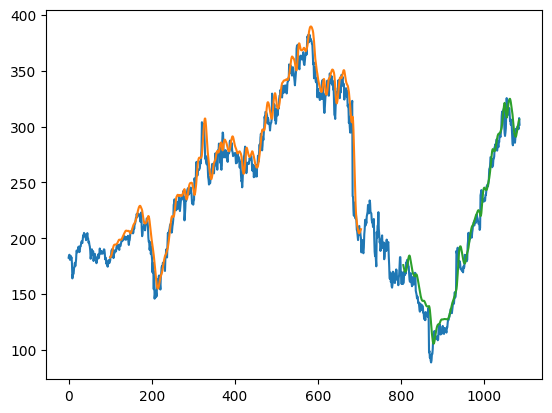

In [17]:
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2) + 1:len(df1) - 1, :] = test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [18]:
x_input = test_data[len(test_data) - time_step:].reshape(1, -1)
temp_input = list(x_input[0])

lst_output = []
n_steps = time_step
i = 0
while i < 200:
    if len(temp_input) > 100:
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1

In [19]:
predicted_value_after_200_days = scaler.inverse_transform(np.array(lst_output[-1]).reshape(-1, 1))

In [20]:
print(f"Predicted stock closing value after 200 days: {predicted_value_after_200_days[0][0]}")

Predicted stock closing value after 200 days: 678.2666102098025
